In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
%matplotlib inline
df = pd.read_csv('HR_comma_sep.csv')

In [4]:
#print(df.shape)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
lefted = df[df.left==1]
retained = df[df.left==0]

print(lefted.shape)
print(retained.shape)

(3571, 10)
(11428, 10)


AttributeError: 'DataFrame' object has no attribute 'disc'

In [22]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


<AxesSubplot:xlabel='salary'>

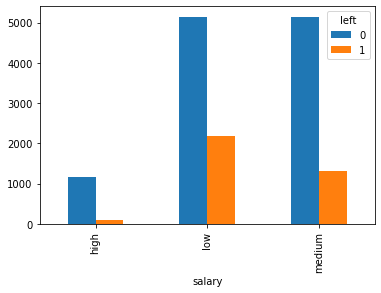

In [23]:
pd.crosstab(df.salary,df.left).plot(kind='bar')

In [38]:
subdf = df.drop(['last_evaluation','number_project','time_spend_company'],axis = 'columns')
subdf.head()

,satisfaction_level,average_montly_hours,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,157,0,1,0,sales,low
1,0.80,262,0,1,0,sales,medium
2,0.11,272,0,1,0,sales,medium
3,0.72,223,0,1,0,sales,low
4,0.37,159,0,1,0,sales,low


In [39]:
subdf = subdf.drop(['Department',],axis = 'columns')
subdf.head()

,satisfaction_level,average_montly_hours,Work_accident,left,promotion_last_5years,salary
0,0.38,157,0,1,0,low
1,0.80,262,0,1,0,medium
2,0.11,272,0,1,0,medium
3,0.72,223,0,1,0,low
4,0.37,159,0,1,0,low


In [40]:
sal = pd.get_dummies(subdf.salary)
sal

,high,low,medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [44]:
# subdf = subdf.drop('salary',axis = 'columns')
# sal = sal.drop('medium',axis = 'columns')
subdf = pd.concat([subdf,sal],axis ='columns')


In [45]:
subdf

,satisfaction_level,average_montly_hours,Work_accident,left,promotion_last_5years,high,low
0,0.38,157,0,1,0,0,1
1,0.80,262,0,1,0,0,0
2,0.11,272,0,1,0,0,0
3,0.72,223,0,1,0,0,1
4,0.37,159,0,1,0,0,1
...,...,...,...,...,...,...,...
14994,0.40,151,0,1,0,0,1
14995,0.37,160,0,1,0,0,1
14996,0.37,143,0,1,0,0,1
14997,0.11,280,0,1,0,0,1


In [46]:
X = subdf.drop(['left'],axis = 'columns')


In [48]:
y = subdf.left


,satisfaction_level,average_montly_hours,Work_accident,promotion_last_5years,high,low
0,0.38,157,0,0,0,1
1,0.80,262,0,0,0,0
2,0.11,272,0,0,0,0
3,0.72,223,0,0,0,1
4,0.37,159,0,0,0,1
...,...,...,...,...,...,...
14994,0.40,151,0,0,0,1
14995,0.37,160,0,0,0,1
14996,0.37,143,0,0,0,1
14997,0.11,280,0,0,0,1


In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.3)
model = LogisticRegression()

In [56]:
model.fit(X_train,y_train)

LogisticRegression()

In [57]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [58]:
model.score(X_test,y_test)

0.7774285714285715